In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Loading the dataset

df= pd.read_csv("http://bit.ly/w-data")
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


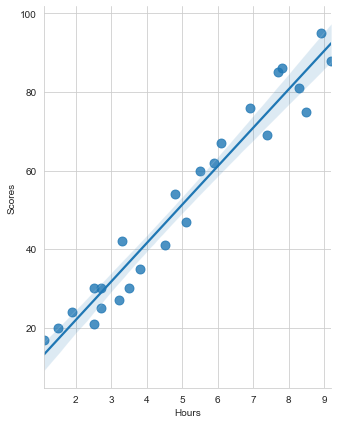

In [5]:
# Visualizing the dataset

sns.set_style('whitegrid')
sns.lmplot(x='Hours', y='Scores', data= df, markers=['o'], scatter_kws={'s': 80}, aspect= 0.8, height= 6)

In [10]:
# Defining feature and target variables

X= df.iloc[:, :-1].values
y= df.iloc[:, -1].values
X.shape, y.shape


((25, 1), (25,))

In [31]:
# Dividing the dataset into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)


(20, 1)
(5, 1)
(20,)
(5,)


In [13]:
# Estimating using LinearRegression from sklearn

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)


2.2051553139001925
[9.84149114]


In [15]:
# Predicting the score

y_pred= lm.predict(X_test)
y_pred


array([52.39676011, 36.65037429, 26.80888316, 16.96739202, 49.44431277])

In [17]:
# Comparing Actual vs Predicted

df1= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1



,Actual,Predicted
0,47,52.396760
1,30,36.650374
2,30,26.808883
3,20,16.967392
4,54,49.444313


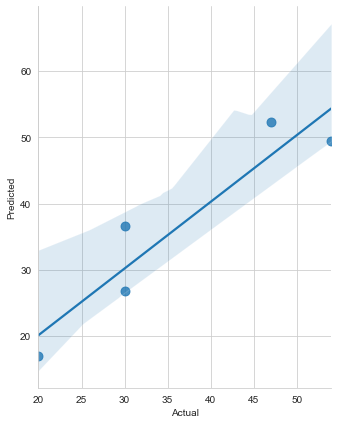

In [20]:
# Visualizing

sns.set_style('whitegrid')
sns.lmplot(x='Actual', y='Predicted', data= df1, markers=['o'], scatter_kws={'s': 80}, aspect= 0.8, height= 6)


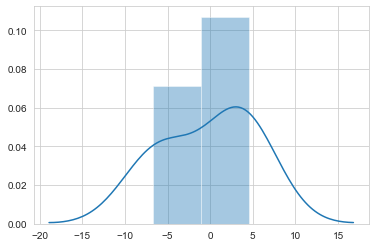

In [22]:
# Plotting the residual

sns.distplot((y_test-y_pred))



In [26]:
# What will be the score of the student who studies for 9.25 hours

hours= np.array([[9.25]])
prediction= lm.predict(hours)
print("No. of hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))


No. of hours = [[9.25]]
Predicted Score = 93.23894833455323


In [28]:
# Calculating the accuracy

from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred)




4.565309291725245

In [29]:
metrics.mean_squared_error(y_test, y_pred)


22.69734439295241

In [30]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

4.764173001996507